In [1]:
import matplotlib.pyplot as plt
import mglearn

# 4. 차원 축소, 특성 추출,  매니 폴드 학습


- 비지도 학습을 사용해 데이터를 변환하는 이유는 여러 가지이다. 일반적인 동기는 시각화거나, 데이터를 압축하거나, 추가적인 처리를 이해 정보가 더 드러나는 표현을 찾기 위해서이다.

- 이번 절에서는 이런 용도로 가장 간단하고 흔히 사용하는 주성분 분석을 소개한다.  

1) 주성분 분석(PCA)

2) 비음수 행렬 분해(Non negative matrix factorization, NMF)

3) t SNE(t-distributed stochastic neighbor embedding)

## 4-1. PCA

- 주성분 분석은 특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전시키는 기술이다. 회전한 뒤에 데이터를 설명하는 데 얼마나 중요하냐에 따라 종종 새로운 특성 중 일부만 선택합니다. 

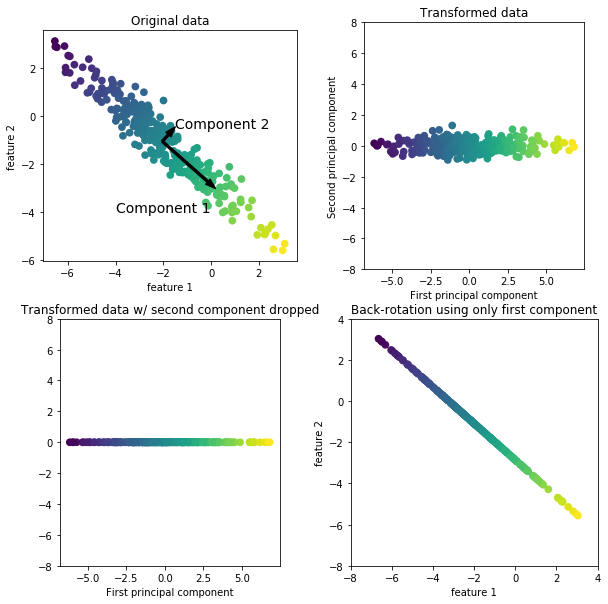

In [2]:
mglearn.plots.plot_pca_illustration()

### PCA를 적용해 유방암 데이터 시각화하기

- PCA가 가장 널리 사용되는 분야는 고차원 데이터 시각화이다. 1장에서 본 것처럼 세 개 이상의 특성을 가진 데이터를 산점도로 표현하기란 쉽지 않다. iris 데이터셋의 경우 2개씩 짝 지은 특성들의 관계를 산점도 행렬로 그릴 수 있다.

- 하지만 유방암 데이터셋에는 산점도 행렬도 적용하기 어렵다. 특성이 30갠느 30 * 24 = 420개의 산점도를 그려야 한다. 이렇게 많은 그래프는 이해하기는 커녕 들여다 보기도 어렵다.

- 이보다 쉬운 방법은 양성과 악성 두 클래스에 대해 각 특성의 히스토그램을 그리는 것이다.

In [3]:
import numpy as np

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

In [5]:
cancer = load_breast_cancer()

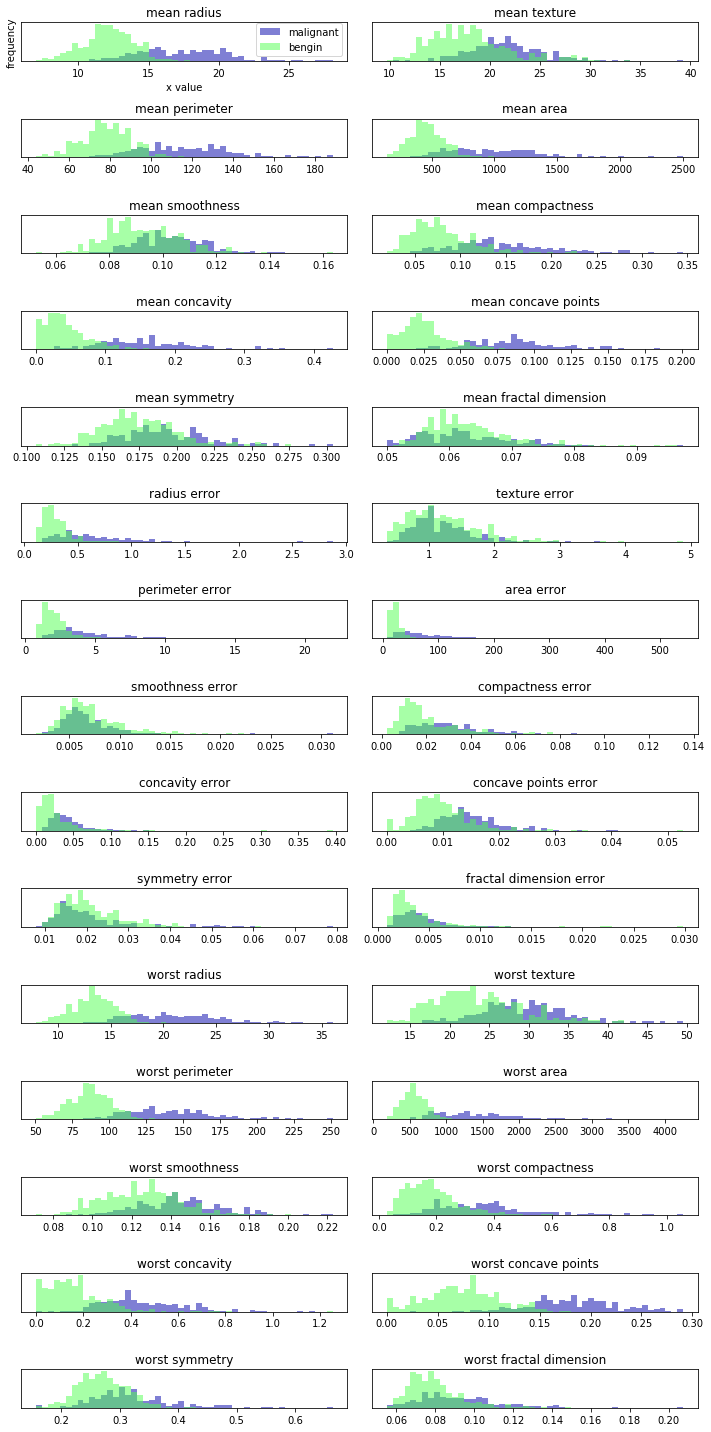

In [6]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=0.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel("x value")
ax[0].set_ylabel('frequency')
ax[0].legend(['malignant', 'bengin'], loc='best')
fig.tight_layout()

- smoothness error 특성은 거의 겹쳐져 별로 쓸모가 없다. 하지만 worst concave points는 두 히스토그램이 확실히 구분되어 매우 유용한 특성이다.

- 이 그래프는 특성 간의 상호작용이나 이 상호작용이 클래스와 어떤 관련이 있는지는 전혀 알려주지 못한다. PCA를 사용하면 주요 상호작용을 사용할 수 있어 더 나은 그림을 만들 수 있습니다. 처음 2개의 주 성분을 찾아 2차원 공간에 하나의 산점도로 데이터를 시각화해본다.

- PCA를 적용하기 전에 StandardScaler를 사용해 각 특성의 분산이 1이 되도록 데이터의 스케일을 조정한다.

In [7]:
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

- PCA 변환을 학습하고 적용하는 것은 데이터 전처리만큼 간단합니다. PCA 객체를 생성하고, fit 메서드를 호출해 주성분을 찾고, transform 메서드를 호출해 데이터를 회전시키고 차원을 축소한다.

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("원본 데이터 형태: {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태: {}".format(str(X_pca.shape)))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


Text(0,0.5,'second principal component')

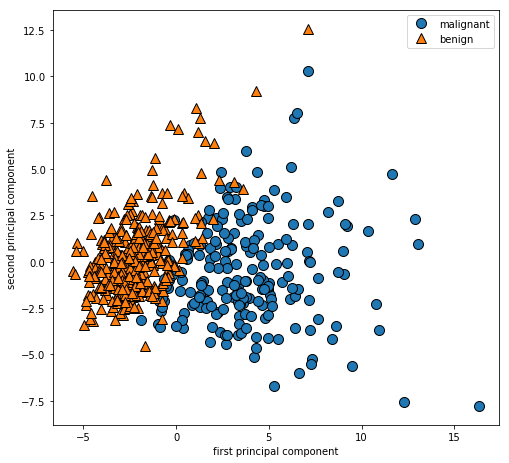

In [9]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], cancer.target)
plt.legend(["malignant", 'benign'], loc='best')
plt.gca().set_aspect("equal")
plt.xlabel("first principal component")
plt.ylabel('second principal component')

- PCA 단점은 그래프의 두 축을 해석하기 쉽지 않다는 점이다. 주성분은 원본 데이터에 있는 어떤 방향에 대응하는 여러 특성이 조합된 형태이다. 잠시 후에 보겠지만 이런 조합이 보통 매우 복잡하다. PCA 객체가 학습될 때 components_ 속성이 주성분에 저장된다.

In [10]:
print("PCA 주성분 형태: {}".format(pca.components_.shape))

PCA 주성분 형태: (2, 30)


In [11]:
print("PCA 주성분:\n{}".format(pca.components_))

PCA 주성분:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0,0.5,'Principal Component')

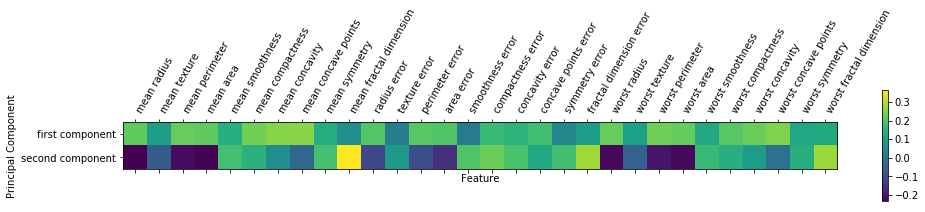

In [12]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["first component", "second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal Component")

### 고유얼굴 특성 추출

- 특성 추출은 원본 데이터 표현보다 분석하기에 더 적합한 표현을 찾을 수 있을 것이란 생각해서 출발한다.

In [13]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

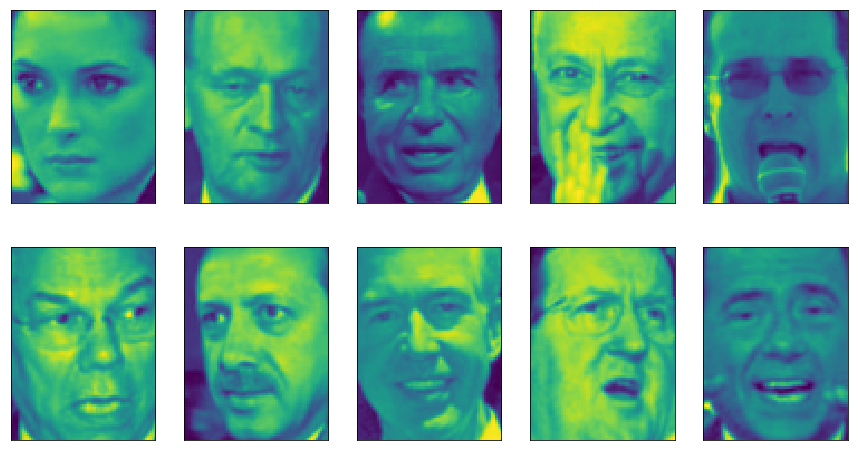

In [14]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (),
                                     'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)

In [15]:
print("people.images.shape: {}".format(people.images.shape))
print("클래스 개수: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
클래스 개수: 62


In [16]:
# 각 타깃이 나타난 횟수 계산
counts = np.bincount(people.target)

for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

- 데이터셋의 편중을 없애기 위해 사람마다 50개 이미지만 선택한다.

In [17]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# 0 ~ 255 사이 흑백 이미지 픽셀을 0 ~ 1 스케일로 조정한다.
X_people = X_people / 255.

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# 데이터를 훈련, 테스트로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

# 이웃 개수를 한 개로 KNeighborsClassifier 모델을 만듭니다.
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1-최근접 이웃 테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))

1-최근접 이웃 테스트 세트 점수: 0.23


- 얼굴의 유사도를 측정하기 위해 원본 픽셀 공간에서 거리를 계산하는 것은 매우 나쁜 방법이다. 그래서 주성분으로 변환하여 거리를 계산하면 정확도가 높아지지 않을까 기대한다. 여기에서는 PCA 화이트닝 옵션을 사용하여 주성분의 스케일이 같아지도록 조정합니다. 이는 화이트닝 옵션 없이 변환 후에 StandardScaler를 적용하는 것과 같습니다.

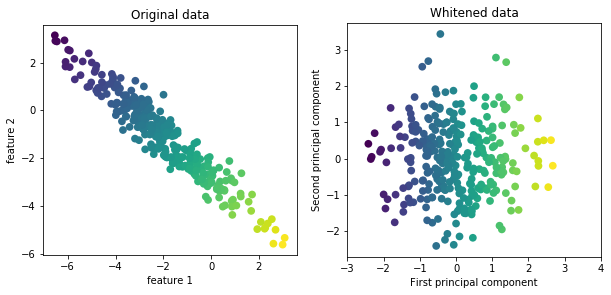

In [19]:
mglearn.plots.plot_pca_whitening()

- PCA 객체를 훈련 데이터로 학습하여 처음 100개 주성분을 추출한다. 

In [20]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca_shape: {}".format(X_train_pca.shape))

X_train_pca_shape: (1547, 100)


In [21]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("테스트 세트 정확도: {:.2f}".format(knn.score(X_test_pca, y_test)))

테스트 세트 정확도: 0.31


In [22]:
print("pca components_.shape: {}".format(pca.components_.shape))

pca components_.shape: (100, 5655)


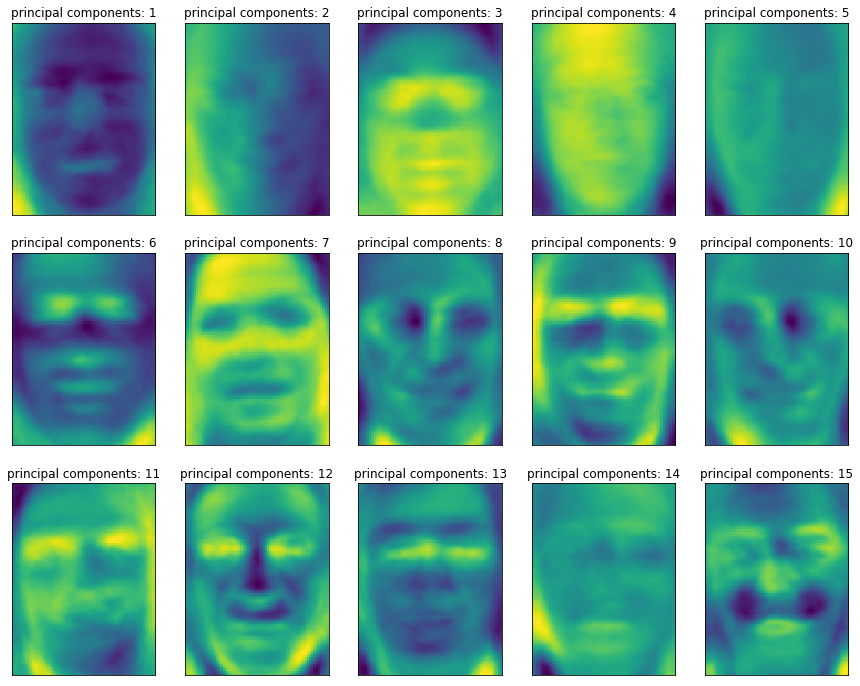

In [23]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("principal components: {}".format((i + 1)))

Text(0,0.5,'second component')

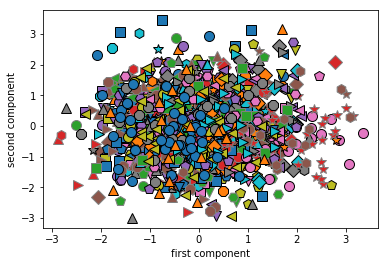

In [26]:
mglearn.discrete_scatter(X_train_pca[:,0], X_train_pca[:,1], y_train)
plt.xlabel("first component")
plt.ylabel("second component")

## 4-2. 비음수 행렬 분해(NMF)

- Non-negative matrix factorization은 유용한 특성을 뽑아내기 위한 또 다른 비지도 학습 알고리즘이다. 이 알고리즘은 PCA와 비슷하고 차원 축소에도 사용할 수 있따. 하지만 PCA에서 데이터의 분산이 가장 크고 수직인 성분을 찾았다면 NMF에서는 음수가 아닌 성분과 계수 값을 찾습니다. 즉, 주성분과 계수가 모두 0보다 크거나 같아야 합니다. 음수가 아닌 주성분과 계수의 가중치 합은 음수가 되지 않으므로 당연하게 이 방식은 음수가 아닌 특성을 가진 데이터에만 적용할 수 있습니다.

### 인위적 데이터에 NMF 적용하기

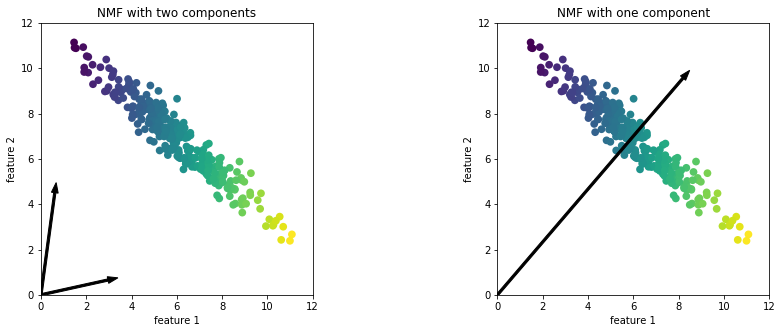

In [27]:
mglearn.plots.plot_nmf_illustration()

- 왼쪽은 성분이 둘인 NMF로, 데이터 셋의 모든 포인트를 양수로 이루어진 두 개의 성분으로 표현할 수 있습니다. 데이터를 완벽하게 재구성할 수 있을 만큼 성분이 아주 많다면, 알고리즘은 에이터의 각 특성의 끝에 위치한 포인트를 가리키는 방향을 선택할 것입니다.


- 하나의 성분만을 사용한다면 NMF는 데이터를 가장 잘 표현할 수 있는 평균으로 향하는 성분을 만듭니다. PCA와는 반대로 성분 개수를 줄이면 특성 방향이 제거되는 것뿐만 아니라 전체 성분이 완전히 바뀝니다. NMF에서 성분은 특정 방식으로 정렬되어 있지도 않아서 첫 번쨰 비음수 성분 같은 것이 없습니다. 즉 모든 성분을 동등하게 취급합니다.


- NMF는 무작위로 초기화하기 때문에 난수 생성 초기값에 따라 결과가 달라집니다. 두 개의 성분으로 모든 데이터를 완벽하게 나타낼 수 있는 이런 간단한 예에서는 난수가 거의 영향을 주지 않습니다. 하지만 복잡한 경우에는 큰 차이를 만들 수도 있습니다.

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))
______________________________________________________nmf_faces - 451.2s, 7.5min


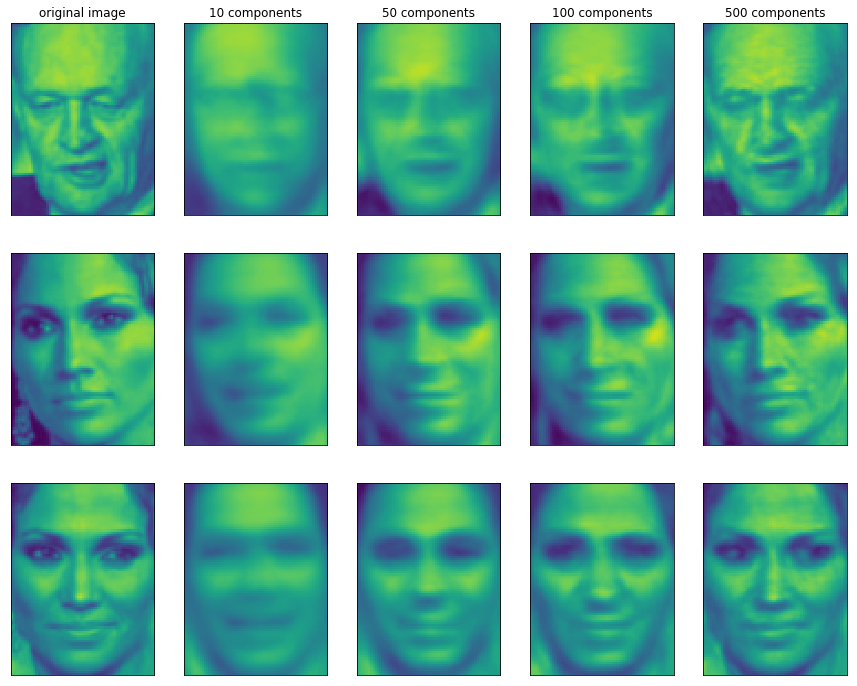

In [30]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

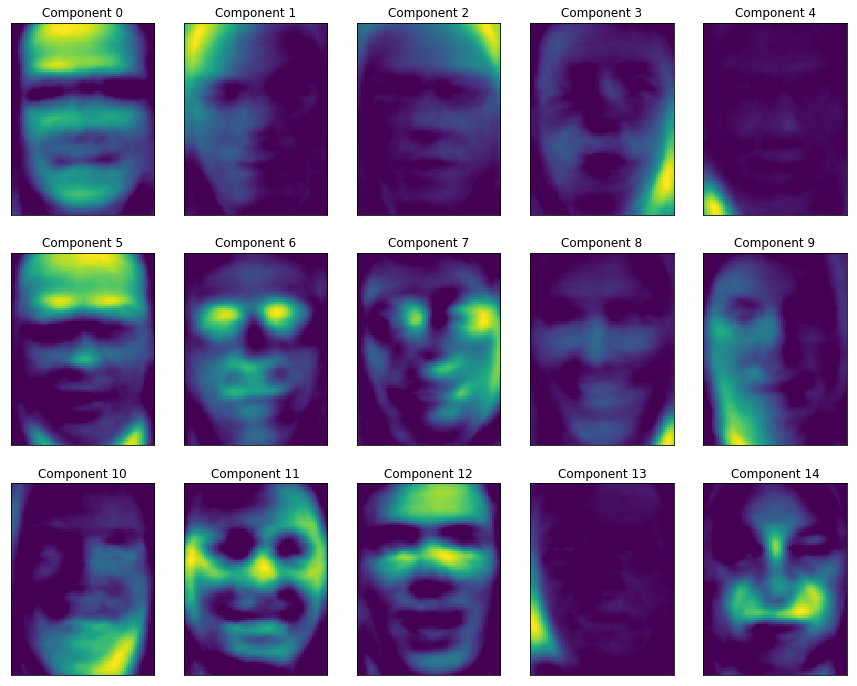

In [36]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)

X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("Component {}".format(i))

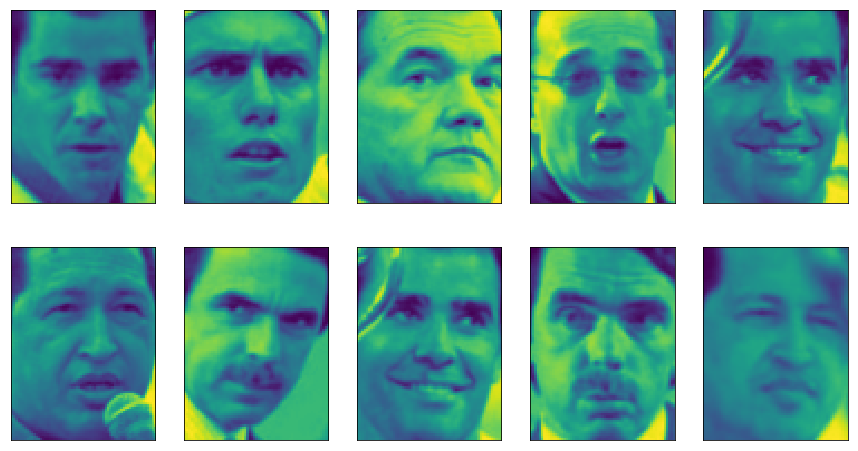

In [38]:
compn = 3

# 4번째 성분으로 정렬하여 처음 10개 이미지를 출력한다.
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), 
                         subplot_kw={'xticks': (), 'yticks': ()})

for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

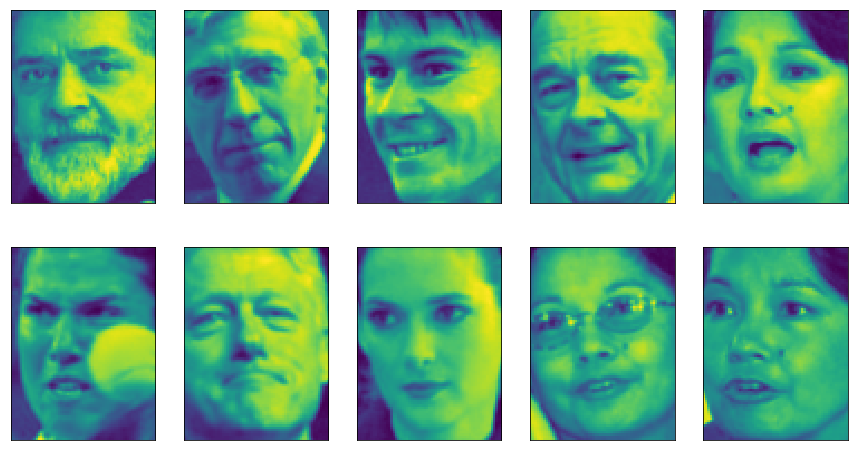

In [39]:
compn = 7

inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})

for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

- 앞서 말한 것처럼, 이와 같은 패턴을 추출하는 것은 소리, 유전자 표현, 텍스트 데이터처럼 덧붙이는 구조를 가진 데이터에 적합하다.

PCA나 NMF철머 데이터 포인트를 일정 개수의 성분을 사용해 가중치 합으로 분해할 수 있는 알고리즘이 많이 있습니다. 전부를 다루는 것은 이 책의 범위를 넘어서며 성분과 계수에 관심있는 제약을 설명하려면 확률 이론이 필요할 때가 많습니다.

- ICA: 독립 성분 분석
- FA: 요인 분석
- Sparse Coding: 희소 코딩

## 4-3. T-SNE

- 데이터를 산점도로 시각화 할 수 있다는 이점 때문에 PCA가 종종 데이터 변환에 가장 먼저 시도해볼 만한 방법이지만, LFW 데이터셋의 산점도에서 본 것처럼 알고리즘의 태생상 유용성이 떨어진다. 매니폴드 학습 알고리즘이라고 하는 시각화 알고리즘은 훨씬 복잡한 매핑을 만들어 더 나은 시각화를 제공한다. 특별히 t-SNE 알고리즘을 아주 많이 사용한다.

- 매니폴드 학습 알고리즘은 그 목적이 시각화라 3개 이상의 특성을 뽑는 경우는 거의 없다. t-SNE를 포함해서 일부 매니폴드 알고리즘들은 훈련 데이터를 새로운 표현으로 변환시키지만 새로운 데이터에는 적용하지 못합니다. 즉 테스트 세트에는 적용할 수 없고, 단지 훈련했던 데이터만 변화할 수 있습니다. 즉 테스트 시에는 적용할 수 없다. 그래서 매니폴드 학습은 탐색적 데이터 데이터 분석에 유용하지만 지도 학습 용으로는 거의 사용 하지 않는다. 

- t-SNE의 아이디어는 데이터 포인트를 2차원에 무작위로 표현한 후 원본 특성 공간에서 가까운 포인트는 가깝게, 먼 포인트는 멀어지게 만든다. t-SNE는 멀리 떨어진 포인트와 거리를 보존하는 것보다 가까이 있는 포인트에 더 많은 비중을 둔다. 다시 말해, 이웃 데이터 포인트에 대한 정보를 보존하려 노력한다.

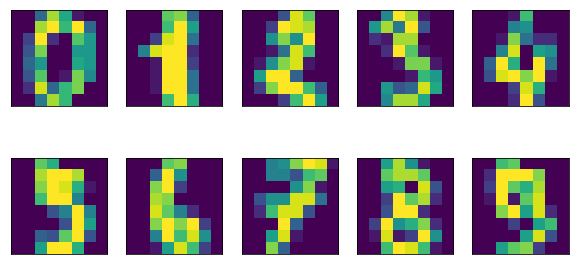

In [45]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks': (), 'yticks': ()})

for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

### PCA를 활용한 2차원 시각화

In [46]:
from sklearn.decomposition import PCA

Text(0,0.5,'Second Component')

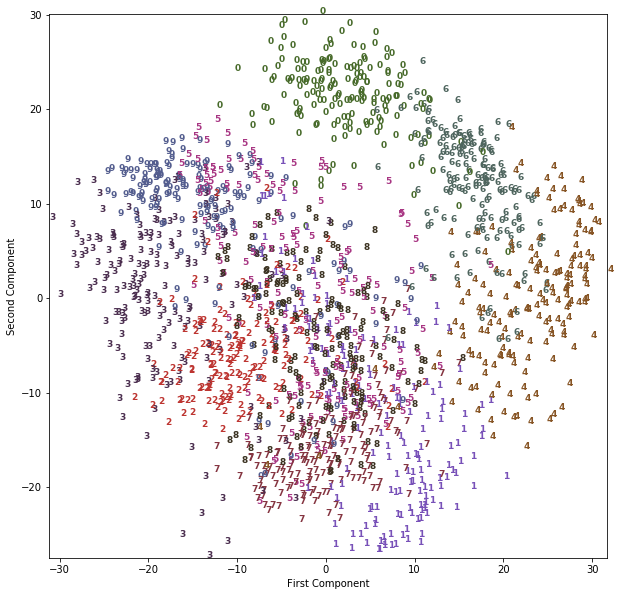

In [47]:
pca = PCA(n_components=2)
pca.fit(digits.data)

# 처음 두 개의 주성분으로 숫자 데이터를 변환한다.
digits_pca = pca.transform(digits.data)

colors=['#476A2A', '#7851B8', '#BD3430', '#4A2D4E', '#875525',
        '#A83683', '#4E655E', '#853541', '#3A3120', '#535D8E']

plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

for i in range(len(digits.data)):
    
    # 숫자 텍스트를 이용해 산점도를 그린다.
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict = {'weight': 'bold', 'size': 9})
    
plt.xlabel("First Component")
plt.ylabel("Second Component")

- 숫자 0, 6, 4는 2개의 주성분만으로 비교적 잘 분리된 것 같습니다만, 아직 중첩된 부분이 있습니다. 다른 숫자들을 대부분 많은 부분이 겹쳐 있다.

- 같은 데이터셋에 t-SNE를 적용해 결과를 비교해보겠습니다. t-SNE는 새 데이터를 변환하는 기능을 제공하지 않으므로 T-SNE 모델에는 trnasform 메서드가 없습니다. 대신 모델을 만들자마자 데이터를 변환하는 fit_transform 메서드를 사용할 수 있다.

In [48]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state = 42)

digits_tsne = tsne.fit_transform(digits.data)

Text(0,0.5,'Second Component')

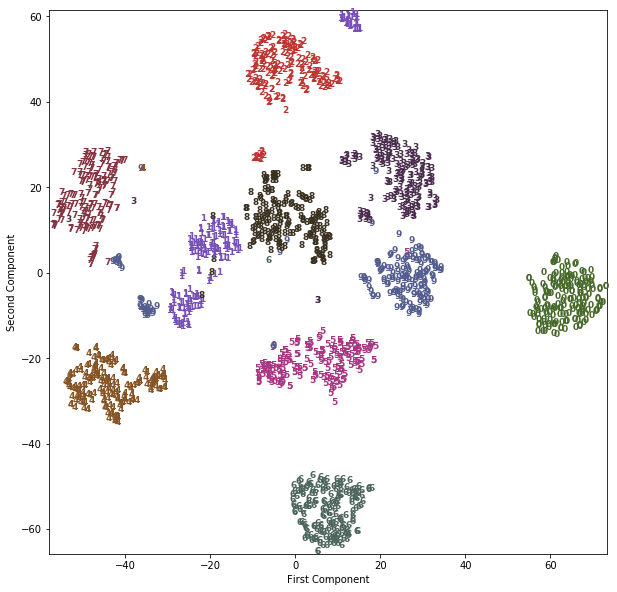

In [49]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)

for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그린다.
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
         color = colors[digits.target[i]],
         fontdict = {'weight': 'bold', 'size': 9})
    
plt.xlabel("First Component")
plt.ylabel("Second Component")

- TSNE는 완전히 비지도 학습이다. 그럼에도 원본 데이터 공간에서 포인트 들이 얼마나 가까이 있는지에 대한 정보로 클래스가 잘 구분되는 2차원 표현을 찾습니다. 